In [1]:
parag_windows = 'C:\\Users\\parag\\Dropbox (Personal)\\sub_lot_paper\\source_code\\'
parag_mac = '/Users/paragsiddique/LoDI Dropbox/sub_lot_paper/source_code/'
import sys
sys.path.append(parag_windows)

In [2]:
from parking_env.parking_lot import *
from parking_env.sub_lot import *
from parking_env.traditional_lot import *
from parking_env.retrieval_algorithms import *
from parking_env.sub_lot_utils import *
from parking_env.utils import *
from parking_env.sub_lot_cost_function import *

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'


## Step 01
Compute width and length of a traditional parking lot with parking capacity $N_{t}$, and shape $r$, where
$r = \frac{W}{L}$ .

In [4]:
no_of_cars_initial_guess = 588
initial_shape = 1

In [5]:
width, length, no_of_cars = compute_width_length(no_of_cars_initial_guess, initial_shape)
print('width ', width)
print('length ', length)
print('no_of_cars ', no_of_cars)

width  378
length  378
no_of_cars  560


## Step 02
Compute width and length of various shapes (0.0 to 2.0) of parking lot keeping the area ($L \cdot W$) same
as in step 1.

In [6]:
new_shape = compute_shapes(width, length)
print(new_shape)

{0.1: (119, 1195), 0.2: (169, 845), 0.3: (207, 690), 0.4: (239, 597), 0.5: (267, 534), 0.6: (292, 487), 0.7: (316, 451), 0.8: (338, 422), 0.9: (358, 398), 1.0: (378, 378), 1.1: (396, 360), 1.2: (414, 345), 1.3: (430, 331), 1.4: (447, 319), 1.5: (462, 308), 1.6: (478, 298), 1.7: (492, 289), 1.8: (507, 281), 1.9: (521, 274), 2.0: (534, 267)}


## Step 03
For all shapes, compute number of cars and retrieval time for both traditional and sub-lot design
(varying $m$ and $n$).

In [7]:
# compute number of cars in traditional parking lots for various shapes of parking lot.
trd_lot = []
for width, length in new_shape.values():
    traditional_parking_lot = TraditionalLot(width, length)
    state = traditional_parking_lot.state()
    trd_lot.append(len(state))
trd_lot = np.array(trd_lot)
print(trd_lot)

[484 480 525 528 513 540 528 525 518 560 546 528 540 517 539 510 520 540
 550 513]


In [8]:
# compute number of cars in sub-lot parking lots for various shapes of parking lot varying m (3 to 10) and n (3 to 6).

sub_lot_sizes = compute_sub_lot_sizes(min_rows=3, max_rows=11, min_cols=3, max_cols=7)
sublot_cars = {}
for sublot_rows, sublot_columns in sub_lot_sizes:
    no_of_cars =[]
    for width, length in new_shape.values():
        modular_parking_lot = ModularLot(width, length, sublot_rows, sublot_columns)
        no_of_cars.append((modular_parking_lot.total_no_of_cars()))
    sublot_cars[(sublot_rows, sublot_columns)] = np.array(no_of_cars)
print(sublot_cars)

{(3, 3): array([363, 368, 399, 384, 378, 420, 396, 420, 407, 400, 420, 440, 405,
       376, 392, 408, 416, 432, 440, 399], dtype=object), (3, 4): array([286, 288, 336, 336, 324, 330, 330, 350, 333, 320, 336, 352, 360,
       329, 343, 306, 312, 324, 330, 342], dtype=object), (3, 5): array([374, 396, 441, 448, 441, 460, 440, 447, 440, 476, 462, 432, 450,
       449, 471, 442, 448, 468, 474, 437], dtype=object), (3, 6): array([382, 404, 462, 456, 432, 480, 462, 443, 438, 474, 504, 476, 450,
       462, 486, 459, 464, 432, 436, 456], dtype=object), (4, 3): array([427, 456, 489, 480, 462, 504, 492, 500, 497, 500, 520, 528, 493,
       464, 488, 504, 520, 510, 518, 483], dtype=object), (4, 4): array([338, 360, 406, 408, 384, 400, 410, 414, 405, 400, 416, 418, 426,
       395, 415, 378, 390, 402, 408, 398], dtype=object), (4, 5): array([418, 424, 453, 468, 457, 468, 456, 471, 458, 500, 474, 462, 468,
       469, 487, 458, 468, 480, 494, 453], dtype=object), (4, 6): array([454, 464, 502, 504

## Density results

In [9]:
# Split sub-lot results according to number of columns.
# this step is performed only to better visualize resutls
cols = [3, 4, 5, 6]
sub_lot_col = [[], [], [], []]
for i in range(len(cols)):
    for x in sub_lot_sizes:
        if x[-1] == cols[i]:
            #print(x)
            sub_lot_col[i].append(sublot_cars[x])
    sub_lot_col[i].append(trd_lot)

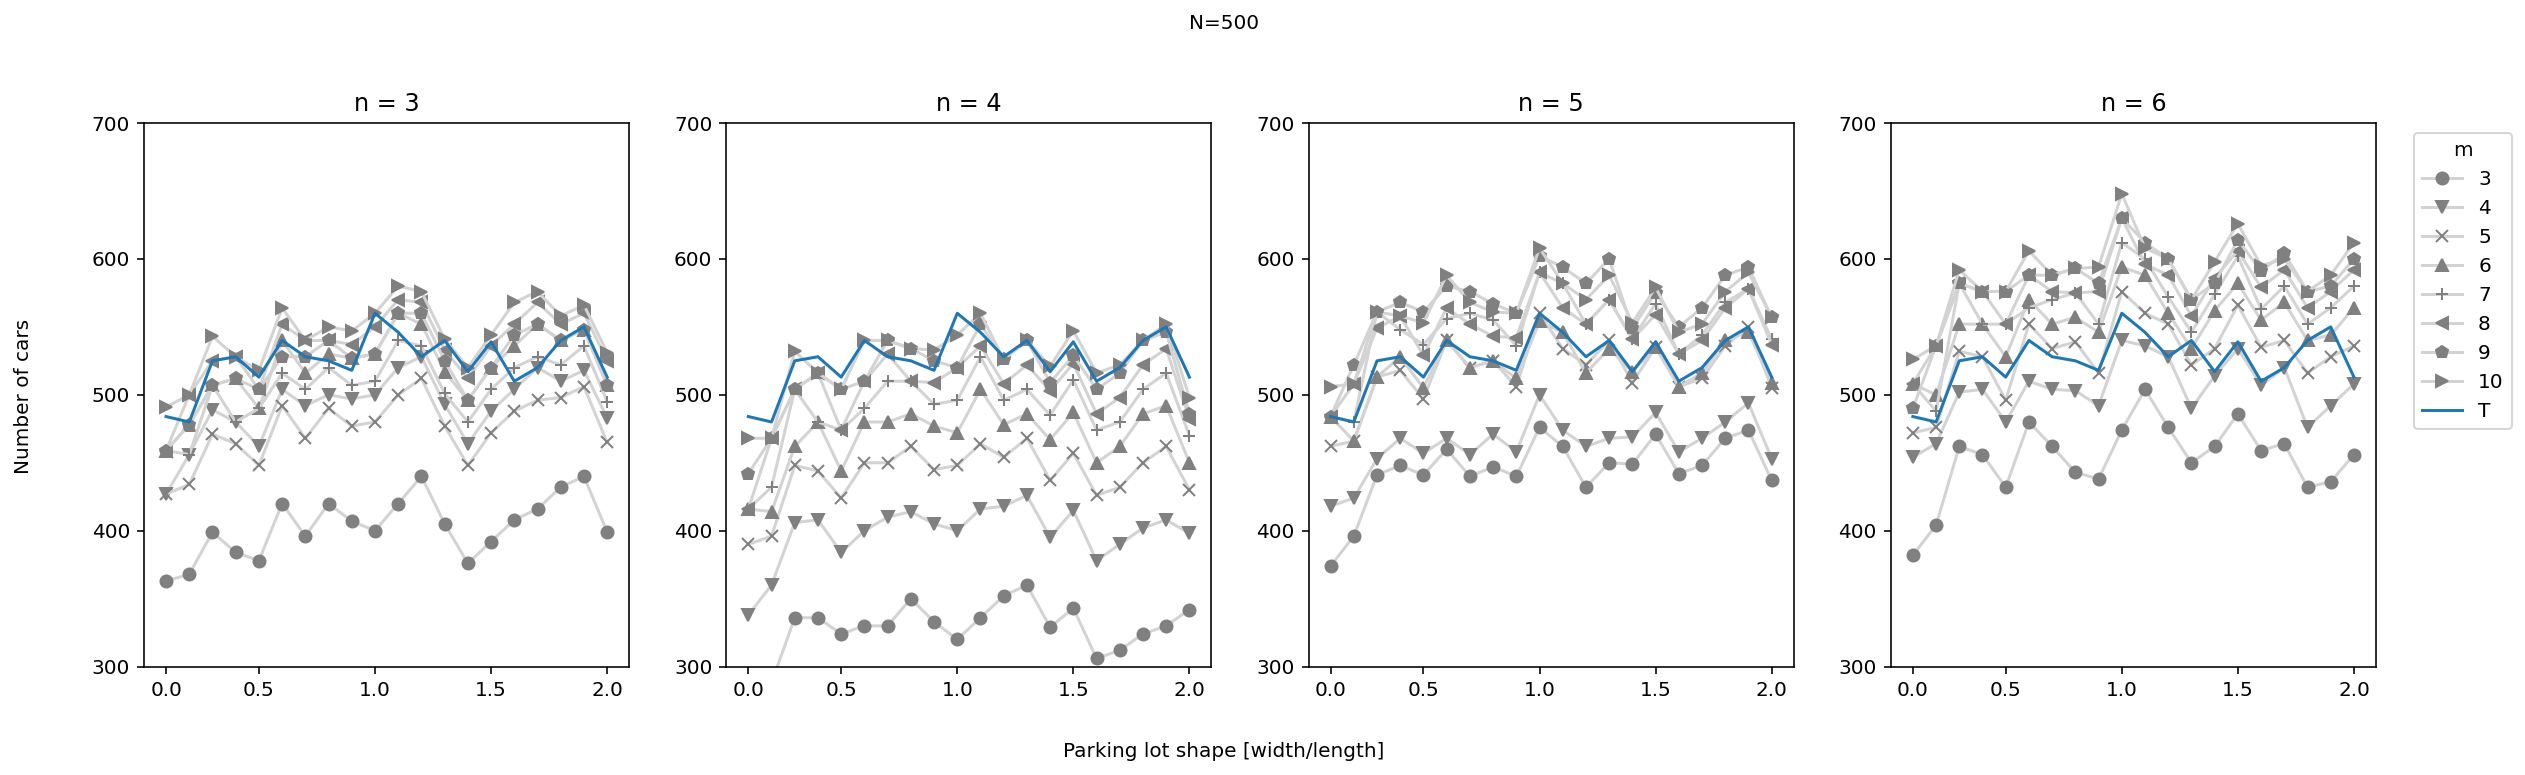

In [14]:
fig=plt.figure(figsize=(20,5))
N=500
columns = 4
rows = 1
for i in range(1, 5):
    fig.add_subplot(rows, columns, i)
    #plt.plot(trd_lot, marker='x')
    indx=0
    for x in sub_lot_col[i-1][:-1]:
        plt.plot(x, color='lightgrey', marker=marker_list[indx], mec = 'gray', mfc = 'gray')
        indx += 1
    plt.plot(sub_lot_col[i-1][-1])
    #plt.xticks([0.0, 0.5, 1.0, 1.5, 2.0], ['0.0','0.5','1.0','1.5', '2.0'])
    plt.xticks([0.0, 4, 9, 14, 19], ['0.0','0.5','1.0','1.5', '2.0'])
    plt.ylim(N-200, N+200)
    y_ticks_values = [N-200, N-100, N, N+100, N+200]
    plt.yticks(y_ticks_values, y_ticks_values)
    plt.title('n = '+str(2+i))
plt.legend([x for x in range(3, 11)]+['T'], title = 'm', bbox_to_anchor=(1.3, 1))
fig.text(0.08, 0.5, 'Number of cars', va='center', rotation='vertical')
fig.text(0.5, 1.01 , 'N='+str(N), ha='center')
fig.text(0.5, 0.00 , 'Parking lot shape [width/length]', ha='center')
#plt.savefig('capacity_100.pdf', bbox_inches = "tight")
#plt.tight_layout()
plt.show()

## Retrieval results

In [11]:
%%time
rt_trad_val =[]
for width, length in new_shape.values():
    rt_trad_val.append(rt_trad(width, length))
rt_trad_val = np.array(rt_trad_val, dtype=object)

In [12]:
%%time
sublot_rt =[]
for sublot_columns in cols:
    retr_time =[]
    for width, length in new_shape.values():
        retr_time.append(rt(width, length, sublot_columns, sublot_rows = 10))
    sublot_rt.append(np.array(retr_time, dtype=object))
sublot_rt.append(rt_trad_val)

Wall time: 37min 31s


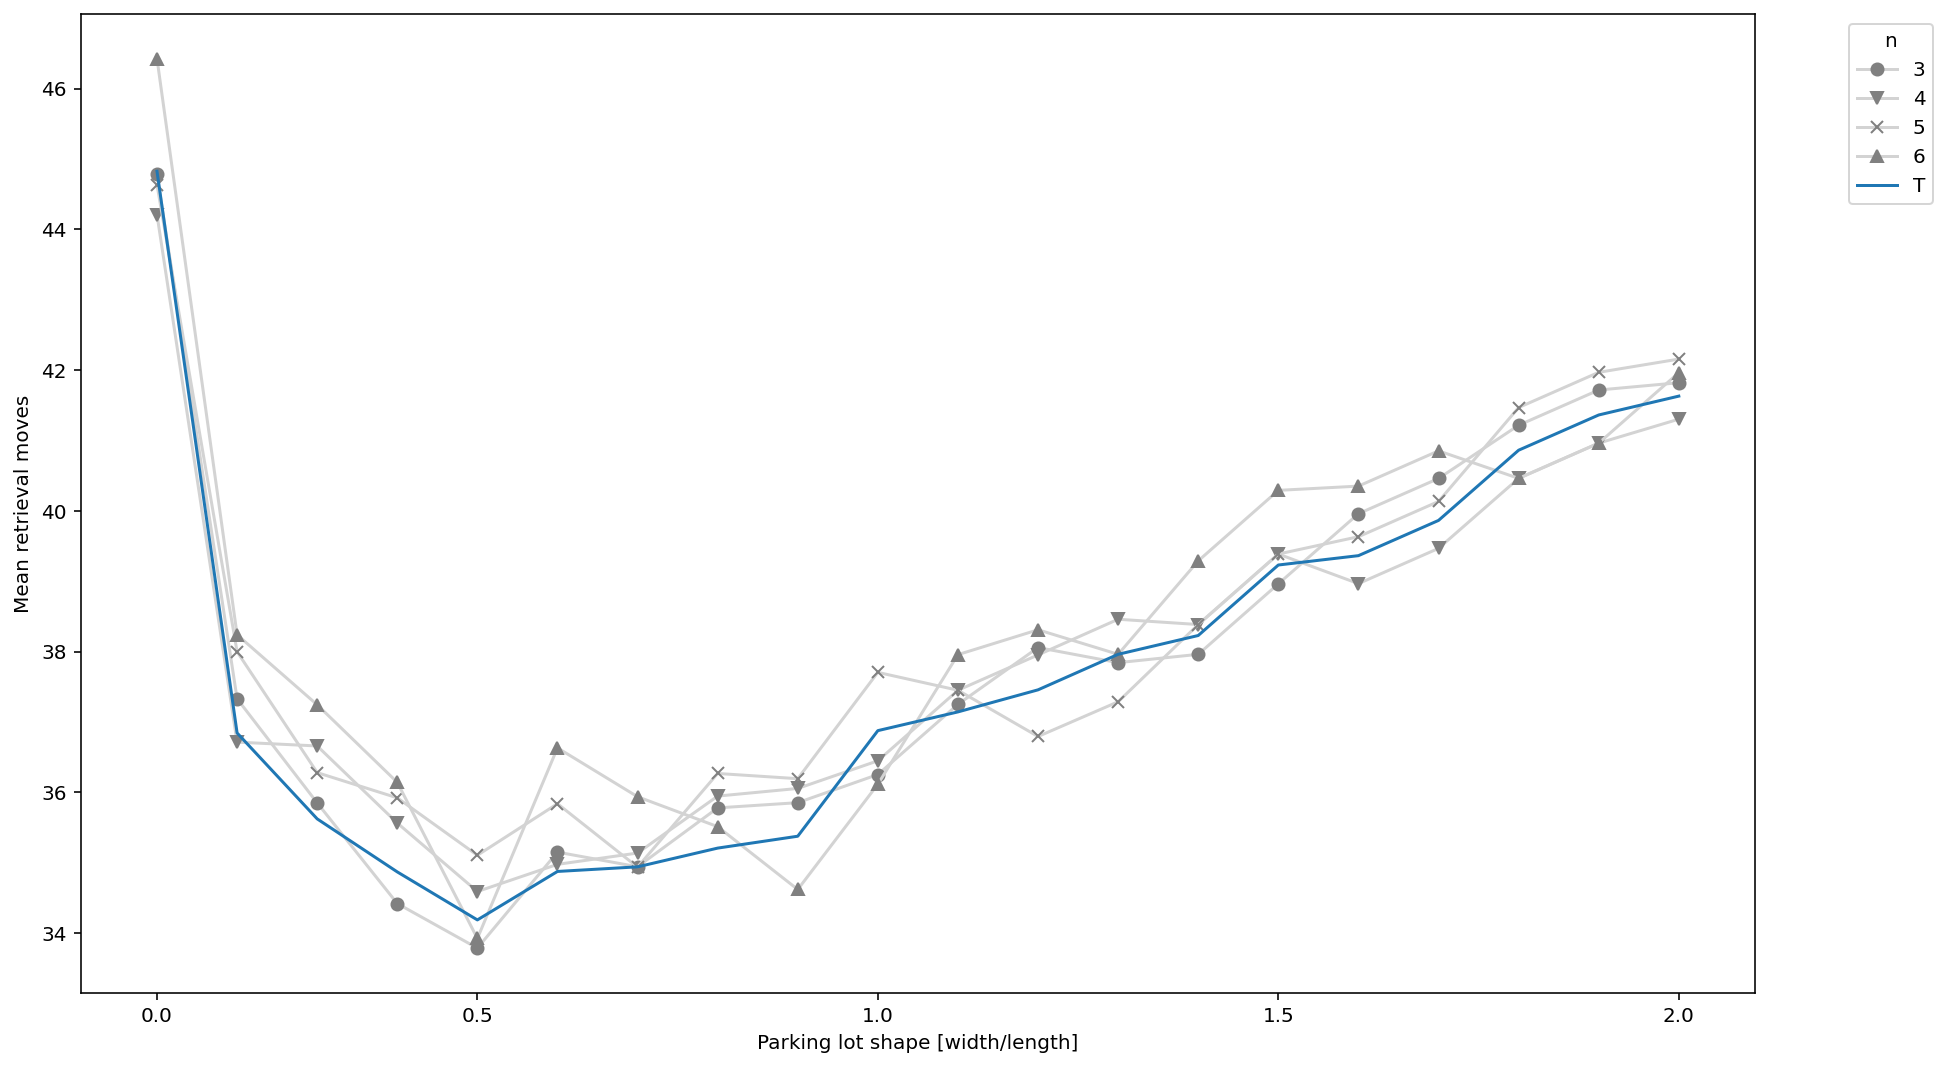

In [13]:
plt.figure(figsize=(15, 9))
plt.plot([np.mean(item) for item in sublot_rt[0]],  marker=marker_list[0], color='lightgrey', mec = 'gray', mfc = 'gray')
plt.plot([np.mean(item) for item in sublot_rt[1]],  marker=marker_list[1], color='lightgrey', mec = 'gray', mfc = 'gray')
plt.plot([np.mean(item) for item in sublot_rt[2]],  marker=marker_list[2], color='lightgrey', mec = 'gray', mfc = 'gray')
plt.plot([np.mean(item) for item in sublot_rt[3]],  marker=marker_list[3], color='lightgrey', mec = 'gray', mfc = 'gray')
plt.plot([np.mean(item) for item in sublot_rt[4]])
#plt.legend(labels=['m'+'x'+str(x) for x in sub_lots_cols],  loc="upper left", bbox_to_anchor=(1.05, 1))
#plt.xticks(list(range(len(new_shape.keys()))), new_shape.keys(), rotation=45)
plt.xticks([0.0, 4, 9, 14, 19], ['0.0','0.5','1.0','1.5', '2.0'])
plt.legend([x for x in range(3, 7)]+['T'], title = 'n', bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel('Parking lot shape [width/length]')
plt.ylabel('Mean retrieval moves')
plt.show()

In [ ]:
save_path = "C:\\Users\\parag\\Dropbox (Personal)\\sub_lot_paper\\source_code\\"
save_results_data = save_results(new_shape, trd_lot, sub_lot_sizes, sublot_cars, rt_trad_val, sublot_rt, save_path, N)